In [23]:
import os, shutil, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.image as mpimg
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization
from keras.regularizers import l2
from sklearn.utils import class_weight 

In [3]:
img_dir = 'Human_Face_Regonition_Images'

part_1_dir = os.path.join(img_dir, 'part1')
part_2_dir = os.path.join(img_dir, 'part2')
part_3_dir = os.path.join(img_dir, 'part3')

In [3]:
part_1_dir

'Human_Face_Regonition_Images\\part1'

In [ ]:
# Split Folder
split_dir = os.path.join(img_dir, 'split2')
os.mkdir(split_dir)

# Train Folder
train_dir = os.path.join(split_dir, 'train')
os.mkdir(train_dir)

# Validation Folder
validation_dir = os.path.join(split_dir, 'validation')
os.mkdir(validation_dir)

# Test Folder
test_dir = os.path.join(split_dir, 'test')
os.mkdir(test_dir)

In [5]:
total_imgs_dir = 'Human_Face_Regonition_Images\\images\\'

total_imgs= [file for file in os.listdir(total_imgs_dir) if file.endswith('.jpg')]

train_imgs = random.sample(total_imgs, 16000)

for img in train_imgs:
    origin = os.path.join(total_imgs_dir, img)
    destination = os.path.join(train_dir, img)
    shutil.copyfile(origin, destination)

In [6]:
rest_imgs = [image for image in total_imgs if image not in train_imgs]

validation_imgs = random.sample(rest_imgs, 5000)

for img in validation_imgs:
    origin = os.path.join(total_imgs_dir, img)
    destination = os.path.join(validation_dir, img)
    shutil.copyfile(origin, destination)

In [7]:
test_imgs = [image for image in rest_imgs if image not in validation_imgs]

for img in test_imgs:
    origin = os.path.join(total_imgs_dir, img)
    destination = os.path.join(test_dir, img)
    shutil.copyfile(origin, destination)

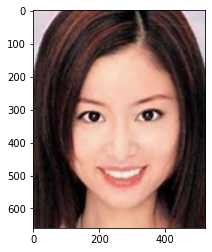

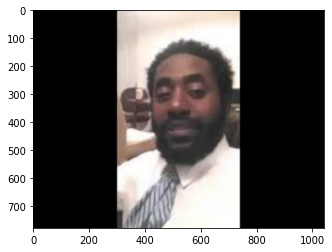

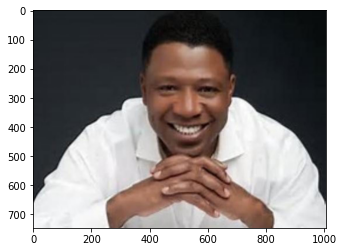

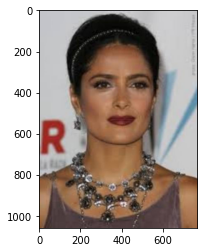

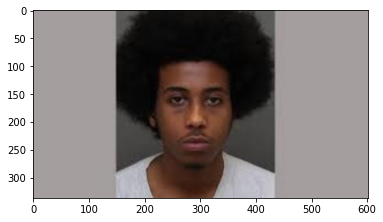

In [8]:
imgs = [mpimg.imread(total_imgs_dir+img) for img in random.sample(total_imgs,5)]

for n in range(5):
    plt.imshow(imgs[n])
    plt.show()

In [9]:
train_ages = [name.split('_')[0] for name in train_imgs]

train_labels = pd.DataFrame({'age' : train_ages})
train_labels['age'] = train_labels['age'].map(lambda x: int(float(x.replace('"', ''))))

train_labels.head()

,age
0,36
1,25
2,23
3,55
4,1


In [10]:
bins = [0, 11, 17, 20, 40, 60, np.inf]
names = ['0-11', '12-17', '18-20', '21-40', '41-60', '61+',]

train_labels['AgeRange'] = pd.cut(train_labels['age'], bins, labels=names)

In [11]:
train_labels.head()

,age,AgeRange
0,36,21-40
1,25,21-40
2,23,21-40
3,55,41-60
4,1,0-11


### Make Foler for each Class

In [12]:
# Get indexes of each age bins
age_0_11_index = list(train_labels[train_labels['AgeRange'] == '0-11'].index)
age_12_17_index = list(train_labels[train_labels['AgeRange'] == '12-17'].index)
age_18_20_index = list(train_labels[train_labels['AgeRange'] == '18-20'].index)
age_21_40_index = list(train_labels[train_labels['AgeRange'] == '21-40'].index)
age_41_60_index = list(train_labels[train_labels['AgeRange'] == '41-60'].index)
age_61_up_index = list(train_labels[train_labels['AgeRange'] == '61+'].index)

In [13]:
age_0_11_imgs = [train_imgs[index] for index in age_0_11_index]
age_12_17_imgs = [train_imgs[index] for index in age_12_17_index]
age_18_20_imgs = [train_imgs[index] for index in age_18_20_index]
age_21_40_imgs = [train_imgs[index] for index in age_21_40_index]
age_41_60_imgs = [train_imgs[index] for index in age_41_60_index]
age_61_up_imgs = [train_imgs[index] for index in age_61_up_index]

In [14]:
def copy_image_to_new_folder(images, list_name, folder_name):
    os.mkdir(os.path.join(folder_name, list_name))
    
    for img in images:
        origin = os.path.join(folder_name, img)
        destination = os.path.join(os.path.join(folder_name, list_name), img)
        shutil.copyfile(origin, destination)

In [15]:
copy_image_to_new_folder(age_0_11_imgs, 'age_0_11_imgs', train_dir)
copy_image_to_new_folder(age_12_17_imgs, 'age_12_17_imgs', train_dir)
copy_image_to_new_folder(age_18_20_imgs, 'age_18_20_imgs', train_dir)
copy_image_to_new_folder(age_21_40_imgs, 'age_21_40_imgs', train_dir)
copy_image_to_new_folder(age_41_60_imgs, 'age_41_60_imgs', train_dir)
copy_image_to_new_folder(age_61_up_imgs, 'age_61_up_imgs', train_dir)

In [16]:
validation_ages = [name.split('_')[0] for name in validation_imgs]

validation_labels = pd.DataFrame({'age' : validation_ages})
validation_labels['age'] = validation_labels['age'].map(lambda x: int(float(x.replace('"', ''))))

validation_labels['AgeRange'] = pd.cut(validation_labels['age'], bins, labels=names)
validation_labels.head()

,age,AgeRange
0,88,61+
1,3,0-11
2,53,41-60
3,38,21-40
4,55,41-60


In [17]:
age_0_11_index = list(validation_labels[validation_labels['AgeRange'] == '0-11'].index)
age_12_17_index = list(validation_labels[validation_labels['AgeRange'] == '12-17'].index)
age_18_20_index = list(validation_labels[validation_labels['AgeRange'] == '18-20'].index)
age_21_40_index = list(validation_labels[validation_labels['AgeRange'] == '21-40'].index)
age_41_60_index = list(validation_labels[validation_labels['AgeRange'] == '41-60'].index)
age_61_up_index = list(validation_labels[validation_labels['AgeRange'] == '61+'].index)

age_0_11_imgs = [validation_imgs[index] for index in age_0_11_index]
age_12_17_imgs = [validation_imgs[index] for index in age_12_17_index]
age_18_20_imgs = [validation_imgs[index] for index in age_18_20_index]
age_21_40_imgs = [validation_imgs[index] for index in age_21_40_index]
age_41_60_imgs = [validation_imgs[index] for index in age_41_60_index]
age_61_up_imgs = [validation_imgs[index] for index in age_61_up_index]

copy_image_to_new_folder(age_0_11_imgs, 'age_0_11_imgs', validation_dir)
copy_image_to_new_folder(age_12_17_imgs, 'age_12_17_imgs', validation_dir)
copy_image_to_new_folder(age_18_20_imgs, 'age_18_20_imgs', validation_dir)
copy_image_to_new_folder(age_21_40_imgs, 'age_21_40_imgs', validation_dir)
copy_image_to_new_folder(age_41_60_imgs, 'age_41_60_imgs', validation_dir)
copy_image_to_new_folder(age_61_up_imgs, 'age_61_up_imgs', validation_dir)

In [18]:
test_ages = [name.split('_')[0] for name in test_imgs]

test_labels = pd.DataFrame({'age' : test_ages})
test_labels['age'] = test_labels['age'].map(lambda x: int(float(x.replace('"', ''))))

test_labels['AgeRange'] = pd.cut(test_labels['age'], bins, labels=names)
test_labels.head()

,age,AgeRange
0,100,61+
1,100,61+
2,10,0-11
3,10,0-11
4,10,0-11


In [20]:
age_0_11_index = list(test_labels[test_labels['AgeRange'] == '0-11'].index)
age_12_17_index = list(test_labels[test_labels['AgeRange'] == '12-17'].index)
age_18_20_index = list(test_labels[test_labels['AgeRange'] == '18-20'].index)
age_21_40_index = list(test_labels[test_labels['AgeRange'] == '21-40'].index)
age_41_60_index = list(test_labels[test_labels['AgeRange'] == '41-60'].index)
age_61_up_index = list(test_labels[test_labels['AgeRange'] == '61+'].index)

age_0_11_imgs = [test_imgs[index] for index in age_0_11_index]
age_12_17_imgs = [test_imgs[index] for index in age_12_17_index]
age_18_20_imgs = [test_imgs[index] for index in age_18_20_index]
age_21_40_imgs = [test_imgs[index] for index in age_21_40_index]
age_41_60_imgs = [test_imgs[index] for index in age_41_60_index]
age_61_up_imgs = [test_imgs[index] for index in age_61_up_index]

copy_image_to_new_folder(age_0_11_imgs, 'age_0_11_imgs', test_dir)
copy_image_to_new_folder(age_12_17_imgs, 'age_12_17_imgs', test_dir)
copy_image_to_new_folder(age_18_20_imgs, 'age_18_20_imgs', test_dir)
copy_image_to_new_folder(age_21_40_imgs, 'age_21_40_imgs', test_dir)
copy_image_to_new_folder(age_41_60_imgs, 'age_41_60_imgs', test_dir)
copy_image_to_new_folder(age_61_up_imgs, 'age_61_up_imgs', test_dir)

In [21]:
train_data_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_data_gen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=128)

validation_data_gen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_data_gen.flow_from_directory(validation_dir, target_size=(256, 256), batch_size=128)

test_data_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_data_gen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=128)

Found 16000 images belonging to 6 classes.
Found 5000 images belonging to 6 classes.
Found 3108 images belonging to 6 classes.


In [22]:
train_imgs, train_labels = next(train_generator)
validation_imgs, validation_labels = next(validation_generator)
test_imgs, test_labels = next(test_generator)

train_images = train_imgs.reshape(train_imgs.shape[0], -1)
validation_images = validation_imgs.reshape(validation_imgs.shape[0], -1)
test_images = test_imgs.reshape(test_imgs.shape[0], -1)

print(train_images.shape, validation_images.shape, test_images.shape)

(128, 196608) (128, 196608) (128, 196608)


In [25]:
model = models.Sequential()
model.add(Dense(128, activation='relu', input_shape=(196608,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

result = model.fit(train_images, train_labels,
                    epochs=15,
                    batch_size=64,
                    validation_data=(validation_images, validation_labels))

Epoch 1/15
2/2 [==============================] - 1s 382ms/step - loss: 10.2605 - accuracy: 0.3047 - val_loss: 31.1161 - val_accuracy: 0.0703
Epoch 2/15
2/2 [==============================] - 0s 230ms/step - loss: 22.3519 - accuracy: 0.3516 - val_loss: 8.7151 - val_accuracy: 0.5078
Epoch 3/15
2/2 [==============================] - 0s 226ms/step - loss: 6.8783 - accuracy: 0.2656 - val_loss: 8.1903 - val_accuracy: 0.0703
Epoch 4/15
2/2 [==============================] - 0s 271ms/step - loss: 5.1610 - accuracy: 0.1562 - val_loss: 5.7974 - val_accuracy: 0.5469
Epoch 5/15
2/2 [==============================] - 0s 262ms/step - loss: 4.1957 - accuracy: 0.5000 - val_loss: 3.6358 - val_accuracy: 0.5469
Epoch 6/15
2/2 [==============================] - 0s 264ms/step - loss: 2.8895 - accuracy: 0.3359 - val_loss: 3.1634 - val_accuracy: 0.5469
Epoch 7/15
2/2 [==============================] - 0s 233ms/step - loss: 2.3779 - accuracy: 0.5000 - val_loss: 2.8163 - val_accuracy: 0.0859
Epoch 8/15
2/2 [=

In [9]:
def plot_loss_accuracy(result):
    history = result.history

    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

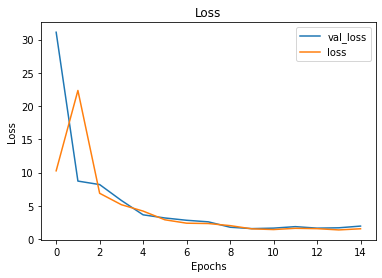

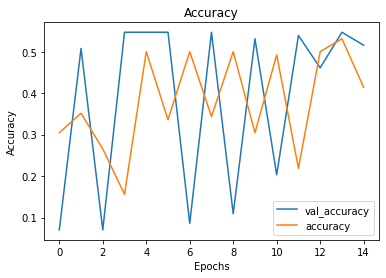

In [27]:
plot_loss_accuracy(result)

In [29]:
result_train = model.evaluate(train_images, train_labels)
result_validation = model.evaluate(validation_images, validation_labels)
result_test = model.evaluate(test_images, test_labels)

print(result_train, result_validation, result_test)

4/4 [==============================] - 0s 16ms/step - loss: 1.6440 - accuracy: 0.4688
[1.4947792291641235, 0.5234375] [1.9410667419433594, 0.515625] [1.643984317779541, 0.46875]


In [36]:
models.save_model(model, 'baseline_model.h5')

In [30]:
cnn_model = models.Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(16, activation='relu'))
cnn_model.add(Dense(6, activation='softmax'))

cnn_model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

result = cnn_model.fit(train_generator,
                    epochs=15,
                    batch_size=64,
                    validation_data=(validation_generator))

Epoch 1/15
125/125 [==============================] - 783s 6s/step - loss: 1.3025 - accuracy: 0.5346 - val_loss: 1.1685 - val_accuracy: 0.5682
Epoch 2/15
125/125 [==============================] - 668s 5s/step - loss: 1.1452 - accuracy: 0.5909 - val_loss: 1.1482 - val_accuracy: 0.5840
Epoch 3/15
125/125 [==============================] - 685s 5s/step - loss: 1.0836 - accuracy: 0.6139 - val_loss: 1.0649 - val_accuracy: 0.6248
Epoch 4/15
125/125 [==============================] - 737s 6s/step - loss: 1.0267 - accuracy: 0.6311 - val_loss: 1.0494 - val_accuracy: 0.6166
Epoch 5/15
125/125 [==============================] - 750s 6s/step - loss: 0.9628 - accuracy: 0.6559 - val_loss: 1.0390 - val_accuracy: 0.6384
Epoch 6/15
125/125 [==============================] - 700s 6s/step - loss: 0.8802 - accuracy: 0.6810 - val_loss: 1.0537 - val_accuracy: 0.6436
Epoch 7/15
125/125 [==============================] - 710s 6s/step - loss: 0.8014 - accuracy: 0.7060 - val_loss: 1.0219 - val_accuracy: 0.6320

In [32]:
cnn_result_train = cnn_model.evaluate(train_generator)
cnn_result_validation = cnn_model.evaluate(validation_generator)
cnn_result_test = cnn_model.evaluate(test_generator)

print(cnn_result_train, cnn_result_validation, cnn_result_test)

25/25 [==============================] - 43s 2s/step - loss: 2.8182 - accuracy: 0.5640
[0.07881699502468109, 0.9770625233650208] [2.772249221801758, 0.579200029373169] [2.818176507949829, 0.5640283226966858]


In [37]:
models.save_model(cnn_model, 'cnn_model_1.h5')

## Data Augmentation

In [3]:
train_dir = 'Human_Face_Regonition_Images\\split2\\train'
validation_dir = 'Human_Face_Regonition_Images\\split2\\validation'
test_dir = 'Human_Face_Regonition_Images\\split2\\test'

In [4]:
train_data_gen_aug = ImageDataGenerator(rescale=1./255, 
                                        rotation_range=30, 
                                        width_shift_range=.2, 
                                        height_shift_range=.2,
                                        zoom_range=0.2)
train_generator_aug = train_data_gen_aug.flow_from_directory(train_dir, target_size=(256, 256), batch_size=128)

validation_data_gen_aug = ImageDataGenerator(rescale=1./255, 
                                        rotation_range=30, 
                                        width_shift_range=.2, 
                                        height_shift_range=.2,
                                        zoom_range=0.2)
validation_generator_aug = validation_data_gen_aug.flow_from_directory(validation_dir, target_size=(256, 256), batch_size=128)

test_data_gen_aug = ImageDataGenerator(rescale=1./255, 
                                        rotation_range=30, 
                                        width_shift_range=.2, 
                                        height_shift_range=.2,
                                        zoom_range=0.2)
test_generator_aug = test_data_gen_aug.flow_from_directory(test_dir, target_size=(256, 256), batch_size=128)

Found 16000 images belonging to 6 classes.
Found 5000 images belonging to 6 classes.
Found 3108 images belonging to 6 classes.


In [39]:
train_imgs_aug, train_labels_aug = next(train_generator_aug)
validation_imgs_aug, validation_labels_aug = next(validation_generator_aug)
test_imgs_aug, test_labels_aug = next(test_generator_aug)

train_images_aug = train_imgs_aug.reshape(train_imgs_aug.shape[0], -1)
validation_images_aug = validation_imgs_aug.reshape(validation_imgs_aug.shape[0], -1)
test_images_aug = test_imgs_aug.reshape(test_imgs_aug.shape[0], -1)

print(train_images_aug.shape, validation_images_aug.shape, test_images_aug.shape)

(128, 196608) (128, 196608) (128, 196608)


In [40]:
model = models.Sequential()
model.add(Dense(128, activation='relu', input_shape=(196608,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

result = model.fit(train_images_aug, train_labels_aug,
                    epochs=15,
                    batch_size=64,
                    validation_data=(validation_images_aug, validation_labels_aug))

Epoch 1/15
2/2 [==============================] - 3s 1s/step - loss: 16.1163 - accuracy: 0.1641 - val_loss: 23.5134 - val_accuracy: 0.1094
Epoch 2/15
2/2 [==============================] - 1s 289ms/step - loss: 15.5614 - accuracy: 0.1953 - val_loss: 12.3235 - val_accuracy: 0.0938
Epoch 3/15
2/2 [==============================] - 0s 286ms/step - loss: 10.0402 - accuracy: 0.1172 - val_loss: 11.5850 - val_accuracy: 0.0312
Epoch 4/15
2/2 [==============================] - 0s 241ms/step - loss: 8.3563 - accuracy: 0.1016 - val_loss: 2.3206 - val_accuracy: 0.1328
Epoch 5/15
2/2 [==============================] - 0s 253ms/step - loss: 2.0406 - accuracy: 0.0859 - val_loss: 2.1831 - val_accuracy: 0.1328
Epoch 6/15
2/2 [==============================] - 0s 261ms/step - loss: 2.0448 - accuracy: 0.3203 - val_loss: 1.7864 - val_accuracy: 0.4844
Epoch 7/15
2/2 [==============================] - 0s 274ms/step - loss: 1.7866 - accuracy: 0.4922 - val_loss: 1.7855 - val_accuracy: 0.4844
Epoch 8/15
2/2 [=

In [41]:
result_train_aug = model.evaluate(train_images_aug, train_labels_aug)
result_validation_aug = model.evaluate(validation_images_aug, validation_labels_aug)
result_test_aug = model.evaluate(test_images_aug, test_labels_aug)

print(result_train_aug, result_validation_aug, result_test_aug)

4/4 [==============================] - 0s 15ms/step - loss: 1.7752 - accuracy: 0.5625
[1.777796745300293, 0.4921875] [1.7779290676116943, 0.484375] [1.7751531600952148, 0.5625]


In [44]:
models.save_model(model, 'aug_baseline_model.h5')

In [42]:
cnn_model_aug = models.Sequential()

cnn_model_aug.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_aug.add(MaxPooling2D((2, 2)))
cnn_model_aug.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_aug.add(MaxPooling2D((2, 2)))
cnn_model_aug.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug.add(MaxPooling2D((2, 2)))
cnn_model_aug.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug.add(MaxPooling2D((2, 2)))
cnn_model_aug.add(Flatten())
cnn_model_aug.add(Dense(64, activation='relu'))
cnn_model_aug.add(Dense(32, activation='relu'))
cnn_model_aug.add(Dense(16, activation='relu'))
cnn_model_aug.add(Dense(6, activation='softmax'))

cnn_model_aug.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

result = cnn_model_aug.fit(train_generator_aug,
                    epochs=10,
                    batch_size=64,
                    validation_data=(validation_generator_aug))

Epoch 1/10
125/125 [==============================] - 786s 6s/step - loss: 1.3525 - accuracy: 0.5135 - val_loss: 1.2563 - val_accuracy: 0.5480
Epoch 2/10
125/125 [==============================] - 769s 6s/step - loss: 1.2531 - accuracy: 0.5494 - val_loss: 1.2030 - val_accuracy: 0.5700
Epoch 3/10
125/125 [==============================] - 767s 6s/step - loss: 1.2199 - accuracy: 0.5627 - val_loss: 1.1967 - val_accuracy: 0.5678
Epoch 4/10
125/125 [==============================] - 793s 6s/step - loss: 1.1970 - accuracy: 0.5688 - val_loss: 1.1858 - val_accuracy: 0.5722
Epoch 5/10
125/125 [==============================] - 767s 6s/step - loss: 1.1817 - accuracy: 0.5729 - val_loss: 1.1464 - val_accuracy: 0.5934
Epoch 6/10
125/125 [==============================] - 782s 6s/step - loss: 1.1447 - accuracy: 0.5890 - val_loss: 1.1271 - val_accuracy: 0.5934
Epoch 7/10
125/125 [==============================] - 785s 6s/step - loss: 1.1287 - accuracy: 0.5960 - val_loss: 1.1096 - val_accuracy: 0.6014

In [43]:
cnn_result_train_aug = cnn_model_aug.evaluate(train_generator_aug)
cnn_result_validation_aug = cnn_model_aug.evaluate(validation_generator_aug)
cnn_result_test_aug = cnn_model_aug.evaluate(test_generator_aug)

print(cnn_result_train_aug, cnn_result_validation_aug, cnn_result_test_aug)

25/25 [==============================] - 64s 3s/step - loss: 1.0620 - accuracy: 0.6219
[1.0410526990890503, 0.6269999742507935] [1.044952392578125, 0.6255999803543091] [1.0619757175445557, 0.6219433546066284]


In [45]:
models.save_model(cnn_model_aug, 'aug_cnn_model_1.h5')

In [9]:
cnn_model_aug2 = models.Sequential()

cnn_model_aug2.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(256, 256, 3)))
cnn_model_aug2.add(MaxPooling2D((2, 2)))
cnn_model_aug2.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug2.add(MaxPooling2D((2, 2)))
cnn_model_aug2.add(Conv2D(128, (3, 3), kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug2.add(MaxPooling2D((2, 2)))
cnn_model_aug2.add(Conv2D(128, (3, 3), kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug2.add(MaxPooling2D((2, 2)))
cnn_model_aug2.add(Flatten())
cnn_model_aug2.add(Dense(64, kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug2.add(Dense(32, kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug2.add(Dense(16, kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug2.add(Dense(6, kernel_regularizer=l2(0.01), activation='softmax'))

cnn_model_aug2.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

result = cnn_model_aug2.fit(train_generator_aug,
                    epochs=10,
                    batch_size=64,
                    validation_data=(validation_generator_aug))

Epoch 1/10
125/125 [==============================] - 861s 7s/step - loss: 2.5618 - accuracy: 0.4994 - val_loss: 1.7858 - val_accuracy: 0.5096
Epoch 2/10
125/125 [==============================] - 684s 5s/step - loss: 1.6706 - accuracy: 0.5216 - val_loss: 1.5612 - val_accuracy: 0.5300
Epoch 3/10
125/125 [==============================] - 905s 7s/step - loss: 1.5256 - accuracy: 0.5276 - val_loss: 1.4678 - val_accuracy: 0.5296
Epoch 4/10
125/125 [==============================] - 862s 7s/step - loss: 1.4710 - accuracy: 0.5297 - val_loss: 1.4281 - val_accuracy: 0.5340
Epoch 5/10
125/125 [==============================] - 781s 6s/step - loss: 1.4456 - accuracy: 0.5308 - val_loss: 1.4262 - val_accuracy: 0.5332
Epoch 6/10
125/125 [==============================] - 816s 7s/step - loss: 1.4258 - accuracy: 0.5316 - val_loss: 1.3966 - val_accuracy: 0.5388
Epoch 7/10
125/125 [==============================] - 854s 7s/step - loss: 1.4113 - accuracy: 0.5313 - val_loss: 1.3879 - val_accuracy: 0.5356

In [10]:
cnn_result_train_aug2 = cnn_model_aug2.evaluate(train_generator_aug)
cnn_result_validation_aug2 = cnn_model_aug2.evaluate(validation_generator_aug)
cnn_result_test_aug2 = cnn_model_aug2.evaluate(test_generator_aug)

print(cnn_result_train_aug2, cnn_result_validation_aug2, cnn_result_test_aug2)

25/25 [==============================] - 61s 2s/step - loss: 1.3836 - accuracy: 0.5338
[1.382203459739685, 0.5365625023841858] [1.3650779724121094, 0.5357999801635742] [1.3835660219192505, 0.5337837934494019]


In [11]:
models.save_model(cnn_model_aug2, 'aug_cnn_model_2_regularizer.h5')

In [12]:
cnn_model_aug3 = models.Sequential()

cnn_model_aug3.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(256, 256, 3)))
cnn_model_aug3.add(MaxPooling2D((2, 2)))
cnn_model_aug3.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug3.add(MaxPooling2D((2, 2)))
cnn_model_aug3.add(Dropout(0.25))
cnn_model_aug3.add(Conv2D(128, (3, 3), kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug3.add(MaxPooling2D((2, 2)))
cnn_model_aug3.add(Conv2D(128, (3, 3), kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug3.add(MaxPooling2D((2, 2)))
cnn_model_aug3.add(Dropout(0.25))
cnn_model_aug3.add(Flatten())
cnn_model_aug3.add(Dense(64, kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug3.add(Dense(32, kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug3.add(Dense(16, kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug3.add(Dense(6, kernel_regularizer=l2(0.01), activation='softmax'))

cnn_model_aug3.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

result = cnn_model_aug3.fit(train_generator_aug,
                    epochs=10,
                    batch_size=64,
                    validation_data=(validation_generator_aug))

Epoch 1/10
125/125 [==============================] - 877s 7s/step - loss: 2.5742 - accuracy: 0.4971 - val_loss: 1.7205 - val_accuracy: 0.5280
Epoch 2/10
125/125 [==============================] - 869s 7s/step - loss: 1.6267 - accuracy: 0.5268 - val_loss: 1.5249 - val_accuracy: 0.5408
Epoch 3/10
125/125 [==============================] - 890s 7s/step - loss: 1.5083 - accuracy: 0.5328 - val_loss: 1.4664 - val_accuracy: 0.5330
Epoch 4/10
125/125 [==============================] - 873s 7s/step - loss: 1.4727 - accuracy: 0.5278 - val_loss: 1.4358 - val_accuracy: 0.5312
Epoch 5/10
125/125 [==============================] - 745s 6s/step - loss: 1.4403 - accuracy: 0.5295 - val_loss: 1.4202 - val_accuracy: 0.5272
Epoch 6/10
125/125 [==============================] - 757s 6s/step - loss: 1.4263 - accuracy: 0.5313 - val_loss: 1.3987 - val_accuracy: 0.5384
Epoch 7/10
125/125 [==============================] - 735s 6s/step - loss: 1.4180 - accuracy: 0.5284 - val_loss: 1.3952 - val_accuracy: 0.5362

In [13]:
cnn_result_train_aug3 = cnn_model_aug3.evaluate(train_generator_aug)
cnn_result_validation_aug3 = cnn_model_aug3.evaluate(validation_generator_aug)
cnn_result_test_aug3 = cnn_model_aug3.evaluate(test_generator_aug)

print(cnn_result_train_aug3, cnn_result_validation_aug3, cnn_result_test_aug3)

25/25 [==============================] - 62s 2s/step - loss: 1.3887 - accuracy: 0.5322
[1.3938630819320679, 0.5348125100135803] [1.3782881498336792, 0.5378000140190125] [1.3886724710464478, 0.5321750044822693]


In [14]:
models.save_model(cnn_model_aug3, 'aug_cnn_model_3_regularizer_drop.h5')

In [5]:
cnn_model_aug4 = models.Sequential()

cnn_model_aug4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_aug4.add(MaxPooling2D((2, 2)))
cnn_model_aug4.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_aug4.add(MaxPooling2D((2, 2)))
cnn_model_aug4.add(Dropout(0.25))
cnn_model_aug4.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug4.add(MaxPooling2D((2, 2)))
cnn_model_aug4.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug4.add(MaxPooling2D((2, 2)))
cnn_model_aug4.add(Dropout(0.25))
cnn_model_aug4.add(Flatten())
cnn_model_aug4.add(Dense(64, activation='relu'))
cnn_model_aug4.add(Dense(32, activation='relu'))
cnn_model_aug4.add(Dense(16, activation='relu'))
cnn_model_aug4.add(Dense(6, activation='softmax'))

cnn_model_aug4.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

result = cnn_model_aug4.fit(train_generator_aug,
                    epochs=10,
                    batch_size=64,
                    validation_data=(validation_generator_aug))

Epoch 1/10
125/125 [==============================] - 864s 7s/step - loss: 1.3872 - accuracy: 0.5051 - val_loss: 1.3098 - val_accuracy: 0.5406
Epoch 2/10
125/125 [==============================] - 853s 7s/step - loss: 1.2894 - accuracy: 0.5387 - val_loss: 1.2600 - val_accuracy: 0.5496
Epoch 3/10
125/125 [==============================] - 823s 7s/step - loss: 1.2462 - accuracy: 0.5537 - val_loss: 1.1955 - val_accuracy: 0.5684
Epoch 4/10
125/125 [==============================] - 822s 7s/step - loss: 1.2045 - accuracy: 0.5686 - val_loss: 1.1738 - val_accuracy: 0.5900
Epoch 5/10
125/125 [==============================] - 821s 7s/step - loss: 1.1820 - accuracy: 0.5784 - val_loss: 1.1498 - val_accuracy: 0.5882
Epoch 6/10
125/125 [==============================] - 819s 7s/step - loss: 1.1470 - accuracy: 0.5929 - val_loss: 1.1144 - val_accuracy: 0.6082
Epoch 7/10
125/125 [==============================] - 876s 7s/step - loss: 1.1175 - accuracy: 0.6059 - val_loss: 1.1084 - val_accuracy: 0.5948

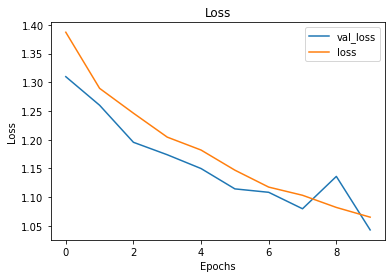

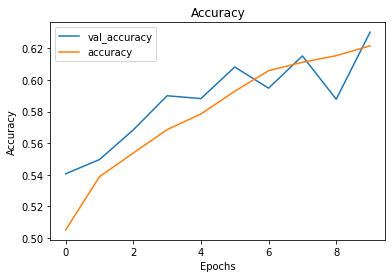

In [10]:
plot_loss_accuracy(result)

In [11]:
cnn_result_train_aug4 = cnn_model_aug4.evaluate(train_generator_aug)
cnn_result_validation_aug4 = cnn_model_aug4.evaluate(validation_generator_aug)
cnn_result_test_aug4 = cnn_model_aug4.evaluate(test_generator_aug)

print(cnn_result_train_aug4, cnn_result_validation_aug4, cnn_result_test_aug4)

25/25 [==============================] - 55s 2s/step - loss: 1.0578 - accuracy: 0.6326
[1.0310454368591309, 0.6335625052452087] [1.0381100177764893, 0.629800021648407] [1.0578447580337524, 0.6325611472129822]


In [35]:
models.save_model(cnn_model_aug4, 'aug_cnn_model_4_drop.h5')

In [12]:
cnn_model_aug5 = models.Sequential()

cnn_model_aug5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_aug5.add(MaxPooling2D((2, 2)))
cnn_model_aug5.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_aug5.add(MaxPooling2D((2, 2)))
cnn_model_aug5.add(Dropout(0.25))
cnn_model_aug5.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug5.add(MaxPooling2D((2, 2)))
cnn_model_aug5.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug5.add(MaxPooling2D((2, 2)))
cnn_model_aug5.add(Dropout(0.25))
cnn_model_aug5.add(Flatten())
cnn_model_aug5.add(Dense(64, activation='relu'))
cnn_model_aug5.add(Dropout(0.25))
cnn_model_aug5.add(Dense(32, activation='relu'))
cnn_model_aug5.add(Dropout(0.25))
cnn_model_aug5.add(Dense(16, activation='relu'))
cnn_model_aug5.add(Dense(6, activation='softmax'))

cnn_model_aug5.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

result = cnn_model_aug5.fit(train_generator_aug,
                    epochs=10,
                    batch_size=64,
                    validation_data=(validation_generator_aug))

Epoch 1/10
125/125 [==============================] - 755s 6s/step - loss: 1.4513 - accuracy: 0.4880 - val_loss: 1.3609 - val_accuracy: 0.5096
Epoch 2/10
125/125 [==============================] - 752s 6s/step - loss: 1.3577 - accuracy: 0.5084 - val_loss: 1.2955 - val_accuracy: 0.5136
Epoch 3/10
125/125 [==============================] - 704s 6s/step - loss: 1.3064 - accuracy: 0.5347 - val_loss: 1.2433 - val_accuracy: 0.5576
Epoch 4/10
125/125 [==============================] - 779s 6s/step - loss: 1.2675 - accuracy: 0.5515 - val_loss: 1.2679 - val_accuracy: 0.5656
Epoch 5/10
125/125 [==============================] - 800s 6s/step - loss: 1.2434 - accuracy: 0.5590 - val_loss: 1.1970 - val_accuracy: 0.5810
Epoch 6/10
125/125 [==============================] - 781s 6s/step - loss: 1.2143 - accuracy: 0.5730 - val_loss: 1.1647 - val_accuracy: 0.5900
Epoch 7/10
125/125 [==============================] - 719s 6s/step - loss: 1.1853 - accuracy: 0.5802 - val_loss: 1.1383 - val_accuracy: 0.5986

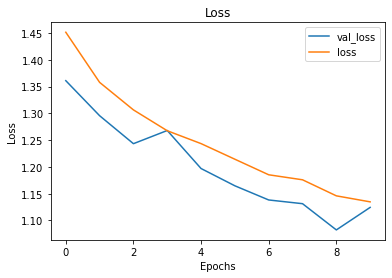

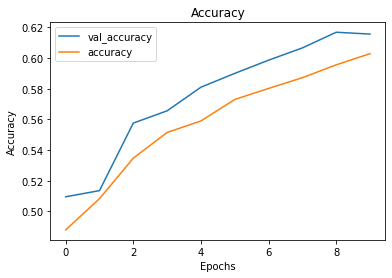

In [13]:
plot_loss_accuracy(result)

In [14]:
cnn_result_train_aug5 = cnn_model_aug5.evaluate(train_generator_aug)
cnn_result_validation_aug5 = cnn_model_aug5.evaluate(validation_generator_aug)
cnn_result_test_aug5 = cnn_model_aug5.evaluate(test_generator_aug)

print(cnn_result_train_aug5, cnn_result_validation_aug5, cnn_result_test_aug5)

25/25 [==============================] - 62s 2s/step - loss: 1.1385 - accuracy: 0.6026
[1.1299070119857788, 0.6107500195503235] [1.1275064945220947, 0.6087999939918518] [1.1385447978973389, 0.6026383638381958]


In [17]:
cnn_model_aug6 = models.Sequential()

cnn_model_aug6.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_aug6.add(MaxPooling2D((2, 2)))
cnn_model_aug6.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_aug6.add(MaxPooling2D((2, 2)))
cnn_model_aug6.add(Dropout(0.25))
cnn_model_aug6.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_aug6.add(MaxPooling2D((2, 2)))
cnn_model_aug6.add(Dropout(0.25))
cnn_model_aug6.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug6.add(MaxPooling2D((2, 2)))
cnn_model_aug6.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug6.add(MaxPooling2D((2, 2)))
cnn_model_aug6.add(Conv2D(32, (3, 3), activation='relu'))
cnn_model_aug6.add(MaxPooling2D((2, 2)))
cnn_model_aug6.add(Dropout(0.25))
cnn_model_aug6.add(Flatten())
cnn_model_aug6.add(Dense(128, activation='relu'))
cnn_model_aug6.add(Dense(64, activation='relu'))
cnn_model_aug6.add(Dense(32, activation='relu'))
cnn_model_aug6.add(Dense(16, activation='relu'))
cnn_model_aug6.add(Dense(6, activation='softmax'))

cnn_model_aug6.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

result = cnn_model_aug6.fit(train_generator_aug,
                    epochs=10,
                    batch_size=64,
                    validation_data=(validation_generator_aug))

Epoch 1/10
125/125 [==============================] - 793s 6s/step - loss: 1.4404 - accuracy: 0.4945 - val_loss: 1.3921 - val_accuracy: 0.5096
Epoch 2/10
125/125 [==============================] - 811s 6s/step - loss: 1.3822 - accuracy: 0.5028 - val_loss: 1.3425 - val_accuracy: 0.5096
Epoch 3/10
125/125 [==============================] - 796s 6s/step - loss: 1.3523 - accuracy: 0.5028 - val_loss: 1.2988 - val_accuracy: 0.5098
Epoch 4/10
125/125 [==============================] - 765s 6s/step - loss: 1.3061 - accuracy: 0.5337 - val_loss: 1.3267 - val_accuracy: 0.5562
Epoch 5/10
125/125 [==============================] - 2391s 19s/step - loss: 1.2532 - accuracy: 0.5532 - val_loss: 1.2376 - val_accuracy: 0.5728
Epoch 6/10
125/125 [==============================] - 757s 6s/step - loss: 1.2041 - accuracy: 0.5763 - val_loss: 1.1327 - val_accuracy: 0.5978
Epoch 7/10
125/125 [==============================] - 713s 6s/step - loss: 1.1615 - accuracy: 0.5906 - val_loss: 1.1163 - val_accuracy: 0.60

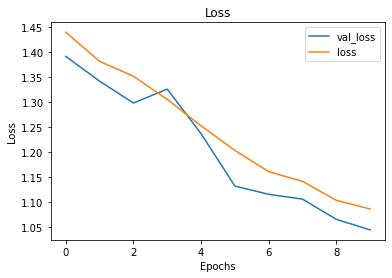

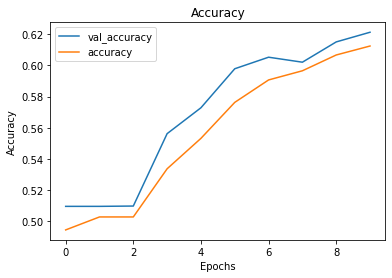

In [18]:
plot_loss_accuracy(result)

In [30]:
cnn_result_train_aug6 = cnn_model_aug6.evaluate(train_generator_aug)
cnn_result_validation_aug6 = cnn_model_aug6.evaluate(validation_generator_aug)
cnn_result_test_aug6 = cnn_model_aug6.evaluate(test_generator_aug)

print(cnn_result_train_aug6, cnn_result_validation_aug6, cnn_result_test_aug6)

25/25 [==============================] - 56s 2s/step - loss: 1.0653 - accuracy: 0.6136
[1.0485336780548096, 0.6234375238418579] [1.0500236749649048, 0.6233999729156494] [1.0653245449066162, 0.6135778427124023]


In [26]:
weight = class_weight.compute_class_weight(
           'balanced',
            np.unique(train_generator_aug.classes), 
            train_generator_aug.classes)

train_class_weights = dict(enumerate(weight))
train_class_weights


{0: 1.1185682326621924,
 1: 4.294149221685454,
 2: 5.698005698005698,
 3: 0.33146882121400456,
 4: 0.9399600516978028,
 5: 1.6210739614994933}

In [27]:
cnn_model_aug7 = models.Sequential()

cnn_model_aug7.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_aug7.add(MaxPooling2D((2, 2)))
cnn_model_aug7.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_aug7.add(MaxPooling2D((2, 2)))
cnn_model_aug7.add(Dropout(0.25))
cnn_model_aug7.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_aug7.add(MaxPooling2D((2, 2)))
cnn_model_aug7.add(Dropout(0.25))
cnn_model_aug7.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug7.add(MaxPooling2D((2, 2)))
cnn_model_aug7.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug7.add(MaxPooling2D((2, 2)))
cnn_model_aug7.add(Conv2D(32, (3, 3), activation='relu'))
cnn_model_aug7.add(MaxPooling2D((2, 2)))
cnn_model_aug7.add(Dropout(0.25))
cnn_model_aug7.add(Flatten())
cnn_model_aug7.add(Dense(128, activation='relu'))
cnn_model_aug7.add(Dense(64, activation='relu'))
cnn_model_aug7.add(Dense(32, activation='relu'))
cnn_model_aug7.add(Dense(16, activation='relu'))
cnn_model_aug7.add(Dense(6, activation='softmax'))

cnn_model_aug7.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

result = cnn_model_aug7.fit(train_generator_aug,
                    epochs=10,
                    batch_size=64,
                    class_weight=train_class_weights,
                    validation_data=(validation_generator_aug))

Epoch 1/10
125/125 [==============================] - 746s 6s/step - loss: 1.7924 - accuracy: 0.1563 - val_loss: 1.7894 - val_accuracy: 0.1852
Epoch 2/10
125/125 [==============================] - 732s 6s/step - loss: 1.7687 - accuracy: 0.2458 - val_loss: 1.7279 - val_accuracy: 0.2750
Epoch 3/10
125/125 [==============================] - 743s 6s/step - loss: 1.7321 - accuracy: 0.2914 - val_loss: 1.7176 - val_accuracy: 0.3042
Epoch 4/10
125/125 [==============================] - 740s 6s/step - loss: 1.7131 - accuracy: 0.3062 - val_loss: 1.6725 - val_accuracy: 0.3884
Epoch 5/10
125/125 [==============================] - 748s 6s/step - loss: 1.6852 - accuracy: 0.3016 - val_loss: 1.6425 - val_accuracy: 0.2578
Epoch 6/10
125/125 [==============================] - 756s 6s/step - loss: 1.6509 - accuracy: 0.3868 - val_loss: 1.7087 - val_accuracy: 0.3016
Epoch 7/10
125/125 [==============================] - 739s 6s/step - loss: 1.6443 - accuracy: 0.3631 - val_loss: 1.5528 - val_accuracy: 0.4902

In [28]:
cnn_result_train_aug7 = cnn_model_aug7.evaluate(train_generator_aug)
cnn_result_validation_aug7 = cnn_model_aug7.evaluate(validation_generator_aug)
cnn_result_test_aug7 = cnn_model_aug7.evaluate(test_generator_aug)

print(cnn_result_train_aug7, cnn_result_validation_aug7, cnn_result_test_aug7)

25/25 [==============================] - 56s 2s/step - loss: 1.5229 - accuracy: 0.4163
[1.5103214979171753, 0.4036875069141388] [1.5141901969909668, 0.4074000120162964] [1.5229483842849731, 0.41634491086006165]


In [34]:
cnn_model_aug8 = models.Sequential()

cnn_model_aug8.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(256, 256, 3)))
cnn_model_aug8.add(MaxPooling2D((2, 2)))
cnn_model_aug8.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug8.add(MaxPooling2D((2, 2)))
cnn_model_aug8.add(Dropout(0.25))
cnn_model_aug8.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug8.add(MaxPooling2D((2, 2)))
cnn_model_aug8.add(Dropout(0.25))
cnn_model_aug8.add(Conv2D(128, (3, 3), kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug8.add(MaxPooling2D((2, 2)))
cnn_model_aug8.add(Conv2D(128, (3, 3), kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug8.add(MaxPooling2D((2, 2)))
cnn_model_aug8.add(Conv2D(32, (3, 3), kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug8.add(MaxPooling2D((2, 2)))
cnn_model_aug8.add(Dropout(0.25))
cnn_model_aug8.add(Flatten())
cnn_model_aug8.add(Dense(128, kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug8.add(Dense(64, kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug8.add(Dense(32, kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug8.add(Dense(16, kernel_regularizer=l2(0.01), activation='relu'))
cnn_model_aug8.add(Dense(6, kernel_regularizer=l2(0.01), activation='softmax'))

cnn_model_aug8.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

result = cnn_model_aug8.fit(train_generator_aug,
                    epochs=15,
                    batch_size=64,
                    class_weight=train_class_weights,
                    validation_data=(validation_generator_aug))

Epoch 1/15
125/125 [==============================] - 818s 6s/step - loss: 3.5677 - accuracy: 0.1636 - val_loss: 2.1364 - val_accuracy: 0.5096
Epoch 2/15
125/125 [==============================] - 765s 6s/step - loss: 1.9479 - accuracy: 0.3891 - val_loss: 1.8502 - val_accuracy: 0.1424
Epoch 3/15
125/125 [==============================] - 677s 5s/step - loss: 1.8239 - accuracy: 0.2252 - val_loss: 1.8073 - val_accuracy: 0.1848
Epoch 4/15
125/125 [==============================] - 747s 6s/step - loss: 1.8008 - accuracy: 0.1141 - val_loss: 1.7966 - val_accuracy: 0.0232
Epoch 5/15
125/125 [==============================] - 775s 6s/step - loss: 1.7946 - accuracy: 0.0479 - val_loss: 1.7936 - val_accuracy: 0.0970
Epoch 6/15
125/125 [==============================] - 793s 6s/step - loss: 1.7927 - accuracy: 0.1521 - val_loss: 1.7919 - val_accuracy: 0.1848
Epoch 7/15
 28/125 [=====>........................] - ETA: 7:41 - loss: 1.7841 - accuracy: 0.0904

KeyboardInterrupt: 